# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# my imports
from urllib.parse import urlencode
import random
import logging
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
my_output_data_file = "output_data/my_cities.csv"
output_png_filePath = "output_data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Declare Time variable
date = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

In [3]:
# randList = random.choices(cities,k=10)


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

records = []
recs = 1
sets = 1


print("Begining Data retrieval")
print("----" * 10)

#for i in randList:
for i in cities:
    params = {
        'appid': weather_api_key,
        'q': i,
        'lang': 'Eng',
        'units': 'imperial',
    }
    url = base_url + urlencode(params)
    
    res = requests.get(base_url + urlencode(params), timeout=5)
    resJson = res.json() if res.status_code==200 else {}
  
    if resJson:
        print(f'Processing Record {recs} of Set {sets} | {i}')
        records.append(resJson)
        recs += 1
        if recs == 50:
            sets +=1
            recs = 0
        continue
    print(f'City not found, skipping')

print("----" * 10)
print(f'Data Retrieval complete, {len(records)} records collected')
print("----" * 10)

Begining Data retrieval
----------------------------------------
Processing Record 1 of Set 1 | solnechnyy
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | busselton
City not found, skipping
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | karlshamn
Processing Record 8 of Set 1 | san carlos de bariloche
City not found, skipping
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | andros town
Processing Record 15 of Set 1 | ternate
Processing Record 16 of Set 1 | nouadhibou
Processing Record 17 of Set 1 | binday
City not found, skipping
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | novoagansk
Processing Record 20 of Set 1 | vaini
Processing Record 21 of S

Processing Record 40 of Set 4 | abhar
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | farmington
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | weiser
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | chumikan
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | menongue
City not found, skipping
Processing Record 0 of Set 5 | fairview
Processing Record 1 of Set 5 | sumbe
Processing Record 2 of Set 5 | kiruna
Processing Record 3 of Set 5 | miri
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | caravelas
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | acarau
Processing Record 8 of Set 5 | kirakira
Processing Record 9 of Set 5 | itaituba
Processing Record 10 of Set 5 | tirumullaivasal
Processing Record 11 of Set 5 | digoin
Processing Record 12 of Set 5 | puerto penasco
Processing Record 13 of Set 5 | ancu

Processing Record 37 of Set 8 | merauke
Processing Record 38 of Set 8 | khandbari
Processing Record 39 of Set 8 | hastings
Processing Record 40 of Set 8 | kalevala
Processing Record 41 of Set 8 | udachnyy
Processing Record 42 of Set 8 | murdochville
City not found, skipping
Processing Record 43 of Set 8 | sitia
Processing Record 44 of Set 8 | fare
Processing Record 45 of Set 8 | dahuk
City not found, skipping
Processing Record 46 of Set 8 | ahipara
Processing Record 47 of Set 8 | muzaffarpur
Processing Record 48 of Set 8 | pandan
Processing Record 49 of Set 8 | linkoping
Processing Record 0 of Set 9 | bone
Processing Record 1 of Set 9 | provideniya
Processing Record 2 of Set 9 | mazyr
Processing Record 3 of Set 9 | shenjiamen
Processing Record 4 of Set 9 | satuk
Processing Record 5 of Set 9 | narrabri
Processing Record 6 of Set 9 | rancho palos verdes
Processing Record 7 of Set 9 | gold coast
Processing Record 8 of Set 9 | dalvik
Processing Record 9 of Set 9 | tazmalt
Processing Record

In [4]:
rename_columnsDict = {
    'name': 'City',
    'coord.lat': 'Lat',
    'coord.lon': 'Lon',
    'main.temp': 'Max Temp',
    'main.humidity': 'Humidity',
    'clouds.all': 'Cloudiness',
    'wind.speed': 'Wind Speed',
    'sys.country': 'Country',
    'dt': 'Date',
}
# finalDFColumns=['City','Lat','Lon','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
DFColumns = [i for i in rename_columnsDict.values()]


In [5]:
# pdDF = recordsDF.rename(columns=rename_columnsDict)
recordsDF = pd.json_normalize(records)
recordsDF.head(5)


,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.deg,clouds.all,sys.country,sys.sunrise,sys.sunset,sys.type,sys.id,wind.gust,rain.1h,snow.1h
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000,1615124318,36000,2016307,Solnechnyy,200,136.6319,50.7214,...,243,0,RU,1615065941,1615106624,NaN,NaN,NaN,NaN,NaN
1,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000,1615124318,7200,3361934,Saldanha,200,17.9442,-33.0117,...,210,100,ZA,1615092108,1615137418,1.0,1943.0,NaN,NaN,NaN
2,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,2024,1615124318,39600,2126199,Cherskiy,200,161.3000,68.7500,...,172,93,RU,1615147693,1615185804,NaN,NaN,NaN,NaN,NaN
3,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1615124318,28800,2075265,Busselton,200,115.3333,-33.6500,...,92,79,AU,1615068699,1615114088,3.0,2008303.0,7.0,NaN,NaN
4,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1615124318,-10800,3874787,Punta Arenas,200,-70.9167,-53.1500,...,270,75,CL,1615112501,1615159670,1.0,8487.0,NaN,NaN,NaN


In [6]:
# Rename columns using our renameDict
recordsDF = recordsDF.rename(columns=rename_columnsDict)
recordsDF = recordsDF[DFColumns]
recordsDF['City_ID'] = [i for i in range(len(recordsDF))]
recordsDF.head(10)


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
0,Solnechnyy,50.7214,136.6319,0.25,88,0,1.99,RU,1615124318,0
1,Saldanha,-33.0117,17.9442,71.60,64,100,17.27,ZA,1615124318,1
2,Cherskiy,68.7500,161.3000,-20.51,88,93,6.44,RU,1615124318,2
3,Busselton,-33.6500,115.3333,67.24,84,79,1.99,AU,1615124318,3
4,Punta Arenas,-53.1500,-70.9167,42.39,87,75,17.27,CL,1615124318,4
5,Castro,-24.7911,-50.0119,69.55,87,75,3.22,BR,1615124249,5
6,Karlshamn,56.1706,14.8619,40.10,38,0,17.27,SE,1615124318,6
7,Bariloche,-41.1456,-71.3082,62.60,59,40,23.02,AR,1615124319,7
8,Cape Town,-33.9258,18.4232,66.49,68,75,20.71,ZA,1615124319,8
9,Mataura,-46.1927,168.8643,51.01,69,85,15.99,NZ,1615124319,9


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#save Dataframe to csv:
recordsDF.to_csv(my_output_data_file, index=False)


### Load DataFrame from csv_file

In [30]:
# Examine the Dataframe from csv.
myCityDF = pd.read_csv(my_output_data_file)
myCityDF.head(4)


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
0,Solnechnyy,50.7214,136.6319,0.25,88,0,1.99,RU,1615124318,0
1,Saldanha,-33.0117,17.9442,71.60,64,100,17.27,ZA,1615124318,1
2,Cherskiy,68.7500,161.3000,-20.51,88,93,6.44,RU,1615124318,2
3,Busselton,-33.6500,115.3333,67.24,84,79,1.99,AU,1615124318,3


In [31]:
myCityDF.describe()


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,City_ID
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02,568.000000
mean,18.860149,20.548042,55.418380,69.061620,48.904930,8.268116,1.615124e+09,283.500000
std,32.933056,90.674283,29.686879,22.329457,39.912578,5.595992,5.744435e+01,164.111751
min,-54.800000,-175.200000,-32.870000,2.000000,0.000000,0.290000,1.615124e+09,0.000000
25%,-9.161400,-58.803300,35.282500,59.000000,1.000000,4.165000,1.615124e+09,141.750000
50%,20.822350,25.451400,64.600000,75.000000,43.500000,6.910000,1.615124e+09,283.500000
75%,46.431850,102.269050,78.780000,86.000000,90.000000,11.500000,1.615124e+09,425.250000
max,78.218600,178.416700,106.450000,100.000000,100.000000,37.980000,1.615124e+09,567.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Look for Cities with Humidity > 100%
myCityDF.loc[myCityDF['Humidity'] > 100]  # No cities with Humidity > 100 


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID


In [35]:
# Get the indicies of cities with Humidity > 100
myCityDF.loc[myCityDF['Humidity'] > 100].index  # None


Int64Index([], dtype='int64')

In [36]:
# Determine if there are any potential outliers
quartiles = myCityDF['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

humidityOutlier = myCityDF.loc[(myCityDF['Humidity'] < lower_bound) | (myCityDF['Humidity'] > upper_bound)]
humidityOutlier

The lower quartile of humidity is: 59.0
The upper quartile of humidity is: 86.0
The interquartile range of humidity is: 27.0
The the median of humidity is: 75.0 
Values below 18.5 could be outliers.
Values above 126.5 could be outliers.


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
73,Khairāgarh,26.9500,77.8167,82.67,15,0,1.83,IN,1615124328,73
92,Adrar,20.5022,-10.0711,79.88,17,0,13.80,MR,1615124331,92
93,Bembèrèkè,10.2283,2.6634,106.45,12,0,4.38,BJ,1615124331,93
149,San Quintín,30.4833,-115.9500,46.99,3,99,8.99,MX,1615124341,149
221,Jeypore,18.8500,82.5833,75.88,18,0,5.70,IN,1615124352,221
230,Arlit,18.7369,7.3853,97.90,8,100,4.61,NE,1615124354,230
250,Kontagora,10.3999,5.4695,105.82,8,73,4.32,NG,1615124357,250
266,Ayorou,14.7308,0.9174,105.51,7,3,11.07,NE,1615124358,266
310,Mandera,3.9366,41.8670,99.77,13,84,13.44,KE,1615124365,310
318,Madarounfa,13.3087,7.1560,98.60,2,0,13.80,NE,1615124366,318


In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Identify and Drop Outliers

In [38]:
outlier_by_index = humidityOutlier.index
outlier_by_index


Int64Index([ 73,  92,  93, 149, 221, 230, 250, 266, 310, 318, 328, 364, 417,
            433, 473, 494, 524, 526, 544, 547, 557, 562],
           dtype='int64')

In [39]:
# Make a copy of the DF 
clean_city_data = myCityDF.copy()
print(len(clean_city_data),'|', len(outlier_by_index))
clean_city_data.head(4)


568 | 22


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
0,Solnechnyy,50.7214,136.6319,0.25,88,0,1.99,RU,1615124318,0
1,Saldanha,-33.0117,17.9442,71.60,64,100,17.27,ZA,1615124318,1
2,Cherskiy,68.7500,161.3000,-20.51,88,93,6.44,RU,1615124318,2
3,Busselton,-33.6500,115.3333,67.24,84,79,1.99,AU,1615124318,3


In [40]:
clean_city_data.drop(index=outlier_by_index, inplace=True)
print(len(clean_city_data))  # expect 568 - 22 = 546
clean_city_data.head(4)


546


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
0,Solnechnyy,50.7214,136.6319,0.25,88,0,1.99,RU,1615124318,0
1,Saldanha,-33.0117,17.9442,71.60,64,100,17.27,ZA,1615124318,1
2,Cherskiy,68.7500,161.3000,-20.51,88,93,6.44,RU,1615124318,2
3,Busselton,-33.6500,115.3333,67.24,84,79,1.99,AU,1615124318,3


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

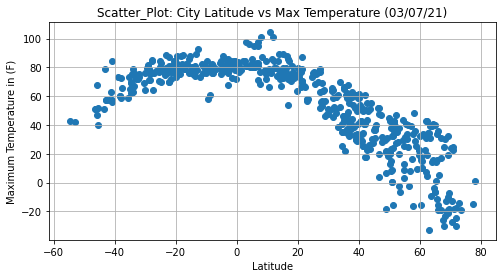

In [41]:
today = date.strftime('%D')
fig, axs = plt.subplots(figsize=(8,4))
LatvsTemp_title = "Scatter_Plot: City Latitude vs Max Temperature"
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title(f'{LatvsTemp_title} ({today})')
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in (F)")
plt.grid()
plt.show()
fig.savefig(f'{output_png_filePath}{LatvsTemp_title}.png')


## Latitude vs. Humidity Plot

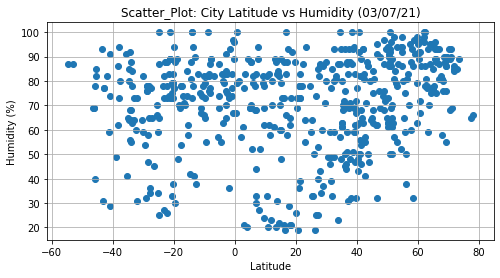

In [42]:
# Lat Vs Humidity
LatVsHum_title = "Scatter_Plot: City Latitude vs Humidity"
fig, axs = plt.subplots(figsize=(8, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title(f'{LatVsHum_title} ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
fig.savefig(f'{output_png_filePath}{LatVsHum_title}.png')


## Latitude vs. Cloudiness Plot

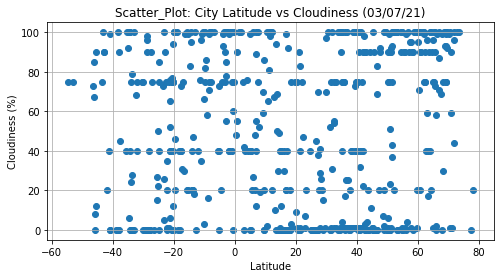

In [43]:
# Lat Vs Cloudiness
LatVsCloud_title = "Scatter_Plot: City Latitude vs Cloudiness"
fig, axs = plt.subplots(figsize=(8, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title(f'{LatVsCloud_title} ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
fig.savefig(f'{output_png_filePath}{LatVsCloud_title}.png')

## Latitude vs. Wind Speed Plot

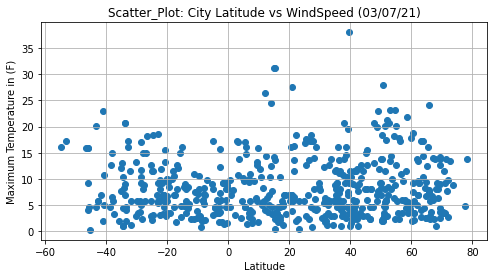

In [44]:
# Lat Vs WindSpeed
LatVsWind_title = "Scatter_Plot: City Latitude vs WindSpeed"
fig, axs = plt.subplots(figsize=(8, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title(f'{LatVsWind_title} ({today})')
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in (F)")
plt.grid()
plt.show()
fig.savefig(f'{output_png_filePath}{LatVsWind_title}.png')

## Linear Regression

In [45]:
# Northern HErmisphere Dataframe
NorthernHermispherDF = clean_city_data.loc[clean_city_data['Lat'] >= 0]

# Southern Hermisphere Dataframe
SouthernHermispherDF = clean_city_data.loc[clean_city_data['Lat'] <= 0]


In [46]:
NorthernHermispherDF.describe()


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,City_ID
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,38.975579,12.200179,43.604066,71.101648,47.200549,8.495577,1.615124e+09,287.752747
std,19.795749,87.933081,30.259206,20.437585,40.641223,5.999116,6.225667e+01,160.209073
min,0.533300,-173.300000,-32.870000,19.000000,0.000000,0.540000,1.615124e+09,0.000000
25%,21.927225,-68.747250,25.100000,59.750000,1.000000,3.837500,1.615124e+09,145.250000
50%,39.802600,16.663250,42.810000,76.000000,40.000000,6.910000,1.615124e+09,280.500000
75%,54.705800,82.466700,70.515000,88.000000,90.000000,11.727500,1.615124e+09,425.750000
max,78.218600,178.416700,104.360000,100.000000,100.000000,37.980000,1.615124e+09,567.000000


In [49]:
SouthernHermispherDF.describe()


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,City_ID
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.000000
mean,-21.251218,37.906191,75.115824,72.010989,54.598901,7.702857,1.615124e+09,266.565934
std,13.039390,98.039728,9.627020,17.132241,37.472032,4.738337,4.862343e+01,169.730640
min,-54.800000,-175.200000,40.120000,25.000000,0.000000,0.290000,1.615124e+09,1.000000
25%,-30.282800,-52.179450,72.082500,65.000000,20.000000,4.505000,1.615124e+09,123.750000
50%,-20.616650,35.458350,77.550000,76.000000,67.500000,6.865000,1.615124e+09,278.500000
75%,-10.238625,141.168775,80.652500,83.000000,90.000000,9.977500,1.615124e+09,409.750000
max,-0.115000,178.300000,92.530000,100.000000,100.000000,23.020000,1.615124e+09,565.000000


#### Northern Hermisphere - Max Temp (F) vs Latitude

The r- value is: 0.7759311853032247


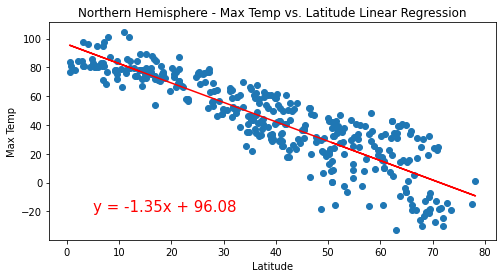

In [48]:
x_values = NorthernHermispherDF['Lat'].astype('float')
y_values = NorthernHermispherDF['Max Temp'].astype('float')
fig, axs = plt.subplots(figsize=(8,4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

#### Southern Hermisphere -  Max Temp (F) vs Latitude

The r- value is: 0.44175733850511234


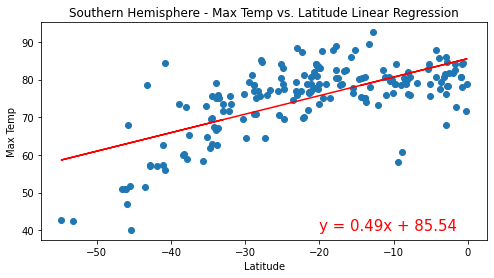

In [51]:
x_values = SouthernHermispherDF['Lat'].astype('float')
y_values = SouthernHermispherDF['Max Temp'].astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.12018425467471909


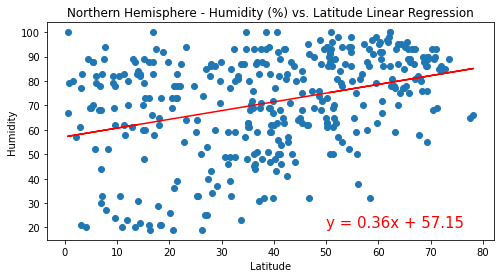

In [54]:
# Humidity vs Lat
x_values = NorthernHermispherDF['Lat']
y_values = NorthernHermispherDF['Humidity'] #.astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.026445552265158878


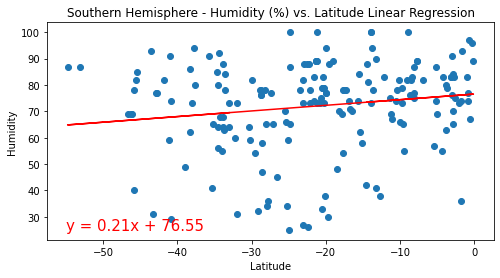

In [64]:
# Lat Vs Humidity
x_values = SouthernHermispherDF['Lat']
y_values = SouthernHermispherDF['Humidity'] #.astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

The r- value is: 0.054949833511055944


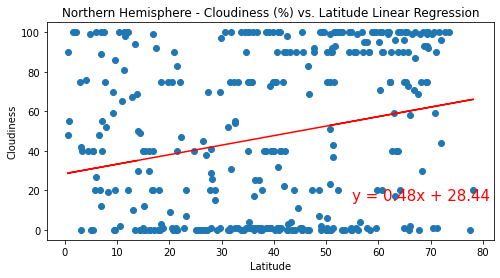

In [70]:
# Lat Vs Cloudiness
x_values = NorthernHermispherDF['Lat']
y_values = NorthernHermispherDF['Cloudiness'] #.astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,15),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r- value is: 0.04646636778604287


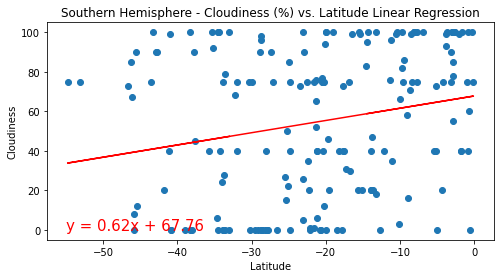

In [73]:
# Lat Vs Humidity
x_values = SouthernHermispherDF['Lat']
y_values = SouthernHermispherDF['Cloudiness'] #.astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: 0.0007984564671151876


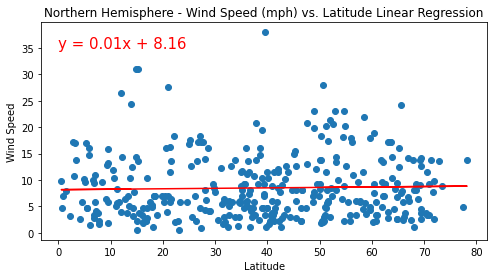

In [76]:
# Windpseed Vs Lat
x_values = NorthernHermispherDF['Lat']
y_values = NorthernHermispherDF['Wind Speed'] #.astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: 0.06958075963054301


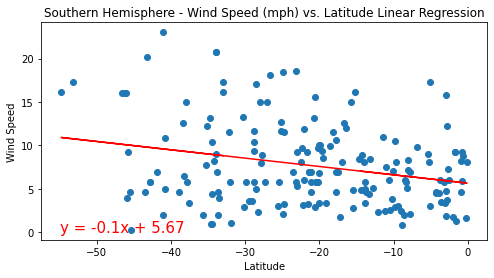

In [79]:
# Windspeed Vs Lat
x_values = SouthernHermispherDF['Lat']
y_values = SouthernHermispherDF['Wind Speed'].astype('float')
fig, axs = plt.subplots(figsize=(8, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r- value is: {rvalue**2}")

# Show plot
plt.show()

## Analysis:
- As you move further away north or south from the equator, the weather gets colder
- Tempersatures are much colder towards the northern hermisphere than they are in the southern hermisphere
